In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## 1. Dataset Preparation

In [4]:
#Load the Sklearn MNIST Dataset
digits=load_digits()

In [5]:
X=digits.data
Y=digits.target

In [6]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


In [7]:
# 64 features, each image is a 8X8 image

1


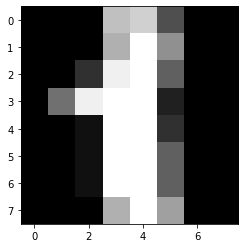

In [8]:
plt.imshow(X[1].reshape((8,8)),cmap='gray')
print(Y[1])
plt.show()

In [9]:
#discrete feature values ->multinomial naive bayes
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [10]:
#Gray scale-> one channel [0,15] ->0(black)  15(white)
#RGB img-> three channels [0,255] ->for each channel

# Train Models

In [11]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [12]:
mnb=MultinomialNB()
gnb=GaussianNB()

In [13]:
#Train
mnb.fit(X,Y)
gnb.fit(X,Y)


GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
#Score
print(mnb.score(X,Y))  #higher accuracy->discrete features
print(gnb.score(X,Y))   #not continuous features

0.9053978853644964
0.8580968280467446


In [15]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10)

array([0.76111111, 0.81666667, 0.90555556, 0.68333333, 0.73888889,
       0.83888889, 0.86666667, 0.86592179, 0.82681564, 0.81005587])

In [16]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8113904407200497

In [17]:
#Average Accuracy-> calculated using cross validation of score

In [18]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8797858472998138

* This is because each feature is discrete valued ! Hence MNB gives better results!

## Constructing and Visualising Confusion Matrix

In [33]:
classes_labels=np.arange(10)
print(classes_labels)

[0 1 2 3 4 5 6 7 8 9]


In [40]:
from sklearn.metrics import confusion_matrix

Y_mnb=mnb.predict(X)
cnf_matrix=confusion_matrix(Y,Y_mnb)
print(cnf_matrix)

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


#### Note - Diagonal entries represent #no. of elements where Predicted class =Actual class

In [41]:

"""Use this method directly - """
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


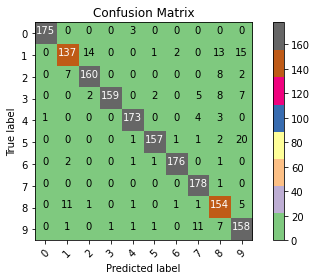

In [42]:
plot_confusion_matrix(cnf_matrix,classes=classes_labels,normalize=False,title="Confusion Matrix",cmap=plt.cm.Accent)


Confusion matrix, without normalization
[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


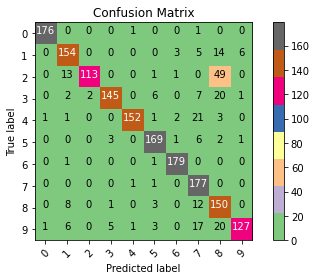

In [43]:
from sklearn.metrics import confusion_matrix

Y_gnb=gnb.predict(X)
cnf_matrix=confusion_matrix(Y,Y_gnb)
plot_confusion_matrix(cnf_matrix,classes=classes_labels,normalize=False,title="Confusion Matrix",cmap=plt.cm.Accent)


In [ ]:
### From Confusio